In [29]:
#Name-Neha Somvanshi
#project_name- Bank Marketing :Term Deposit Prediction
#Batch number- DS2307

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df_train=pd.read_csv(r"E:\termdeposit_train.csv")
df_test=pd.read_csv(r"E:\termdeposit_test.csv")

In [35]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [36]:
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [38]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [39]:
#checking missing values in the dataset

print('Missing value:\n', df_train.isnull().sum())

Missing value:
 ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64


In [40]:
print('Missing value:\n', df_test.isnull().sum())

Missing value:
 ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64


In [41]:
#is used to count the number of unique values in each column of a pandas DataFrame
     
df_train.apply(lambda x: len(x.unique()))

ID            31647
age              76
job              12
marital           3
education         4
default           2
balance        6326
housing           2
loan              2
contact           3
day              31
month            12
duration       1454
campaign         45
pdays           509
previous         38
poutcome          4
subscribed        2
dtype: int64

In [42]:
#is used to count the number of unique values in each column of a pandas DataFrame
     
df_test.apply(lambda x: len(x.unique()))

ID           13564
age             75
job             12
marital          3
education        4
default          2
balance       4292
housing          2
loan             2
contact          3
day             31
month           12
duration      1201
campaign        40
pdays          422
previous        33
poutcome         4
dtype: int64

In [43]:
#Frequency of 'subscribed'
df_train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<AxesSubplot:xlabel='subscribed', ylabel='count'>

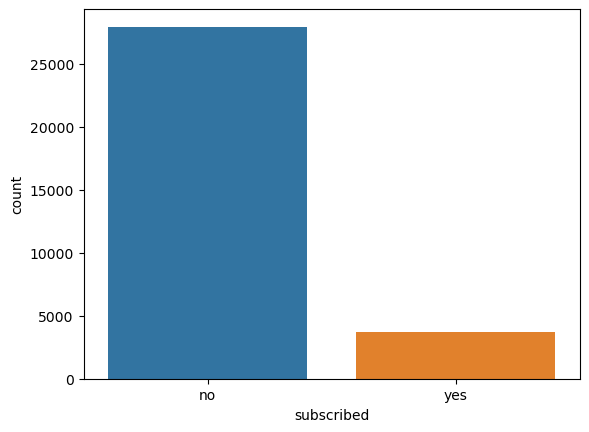

In [44]:
# Plotting the 'subscribed' frequency
sns.countplot(data=df_train, x='subscribed')

In [45]:
#Normalizing the frequency table of 'Subscribed' variable
df_train['subscribed'].value_counts(normalize=True)
     

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

In [46]:
#Frequency table
df_train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

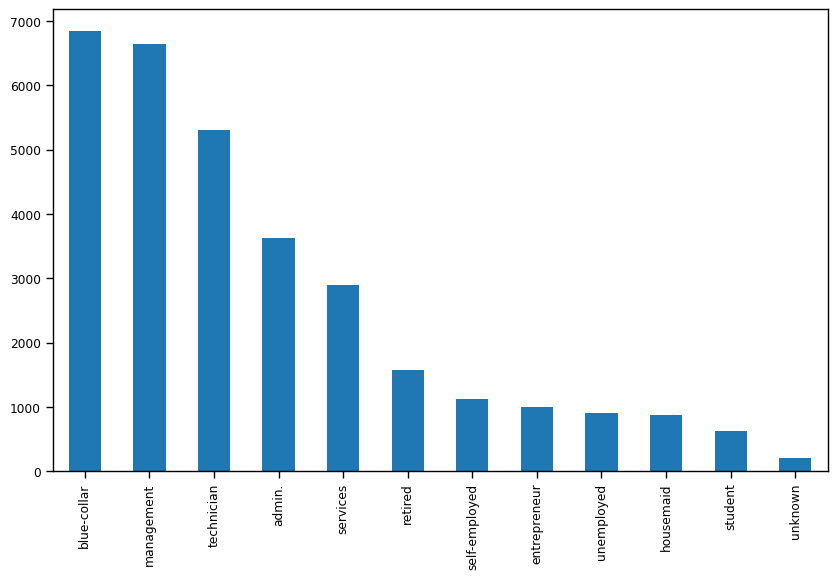

In [47]:
# Plotting the job frequency table
sns.set_context('paper')
df_train['job'].value_counts().plot(kind='bar', figsize=(10,6));

In [48]:
# Converting the target variables into 0s and 1s
df_train['subscribed'].replace('no', 0,inplace=True)
df_train['subscribed'].replace('yes', 1,inplace=True)

In [49]:
df_train['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [50]:
#Correlation matrix
tc = df_train.corr()
tc

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


# Model Building

In [51]:
target = df_train['subscribed']
train = df_train.drop('subscribed', axis=1)

In [52]:
train = df_train.drop(['education'], axis=1)

In [53]:
train = df_train.drop(['job',	'marital',	'default','housing',	'loan',	'contact','month','previous'], axis=1)
   

In [54]:
train = df_train.drop(['ID'], axis=1)

In [55]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,0
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,1
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,0
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,0


In [56]:
#generating dummy values on the train dataset
train = pd.get_dummies(train)
train.head()

,age,balance,day,duration,campaign,pdays,previous,subscribed,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,56,1933,19,44,2,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,31,3,20,91,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,27,891,18,240,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,57,3287,22,867,1,84,3,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,31,119,4,380,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
#Splitting the data into train and validation set such as to validate the results of our model on the validation set. 
#keeping 20% of the dataset as our validation set and the rest as our training set.
     
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=12)

In [58]:
print(X_train.dtypes)

age                    int64
balance                int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
subscribed             int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
default_no             uint8
default_yes            uint8
housing_no             uint8
housing_yes            uint8
loan_no                uint8
loan_yes               uint8
contact_cellular       uint8
contact_teleph

In [59]:
print(y_train.dtypes)

int64


In [60]:
print(X_val.dtypes)

age                    int64
balance                int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
subscribed             int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
default_no             uint8
default_yes            uint8
housing_no             uint8
housing_yes            uint8
loan_no                uint8
loan_yes               uint8
contact_cellular       uint8
contact_teleph

In [61]:
# Train the XGBoost model
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
    'silent': 1.0,
    'n_estimators': 100
}

modelxgb = xgb.XGBClassifier(**params)
modelxgb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = modelxgb.predict(X_val)

# Evaluate the model performance
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

# Display the evaluation results
print('Accuracy:', accuracy)
print('Classification report:')
print(report)

Accuracy: 1.0
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5608
           1       1.00      1.00      1.00       722

    accuracy                           1.00      6330
   macro avg       1.00      1.00      1.00      6330
weighted avg       1.00      1.00      1.00      6330



# Ensemble Models: Random Forest, Decision Tree

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
#creating an object of Decision tree
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [65]:
#fitting the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [66]:
#making predictions on the validation set
predict = clf.predict(X_val)
predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [67]:
#Calculating the accuracy
dt_score=accuracy_score(y_val,predict)
report = classification_report(y_val, predict)
print('Accuracy:', dt_score)
print('Classification report:')
print(report)

Accuracy: 1.0
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5608
           1       1.00      1.00      1.00       722

    accuracy                           1.00      6330
   macro avg       1.00      1.00      1.00      6330
weighted avg       1.00      1.00      1.00      6330



In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [69]:
# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

In [70]:
# Fit the model on the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [71]:
# Make predictions on the testing data
predict1 = rfc.predict(X_val)
predict1

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [72]:
#Calculating the accuracy
rf_score=accuracy_score(y_val,predict1)
report = classification_report(y_val, predict1)
print('Accuracy:', rf_score)
print('Classification report:')
print(report)

Accuracy: 1.0
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5608
           1       1.00      1.00      1.00       722

    accuracy                           1.00      6330
   macro avg       1.00      1.00      1.00      6330
weighted avg       1.00      1.00      1.00      6330



In [73]:
modellists = []
modellists.append(['XGBoost', accuracy * 100])
modellists.append(['Decision Tree', dt_score * 100])
modellists.append(['Random Forest', rf_score * 100])


model_df = pd.DataFrame(modellists, columns = ['Model', 'Accuracy Score'])
model_df

,Model,Accuracy Score
0,XGBoost,100.0
1,Decision Tree,100.0
2,Random Forest,100.0
